**A. TSP	–	Travelling	salesman	problem	–	Problema	del	vendedor	viajante**

Dada	una	lista	de	ubicaciones	y	las	distancias	entre	cada	par	de	ellas,	¿cuál	es	la	ruta
más	corta	posible	que	visita	cada	ubicación	exactamente	una	vez	y	al	finalizar	regresa
a	la	ciudad	origen	formando	un	ciclo	cerrado?

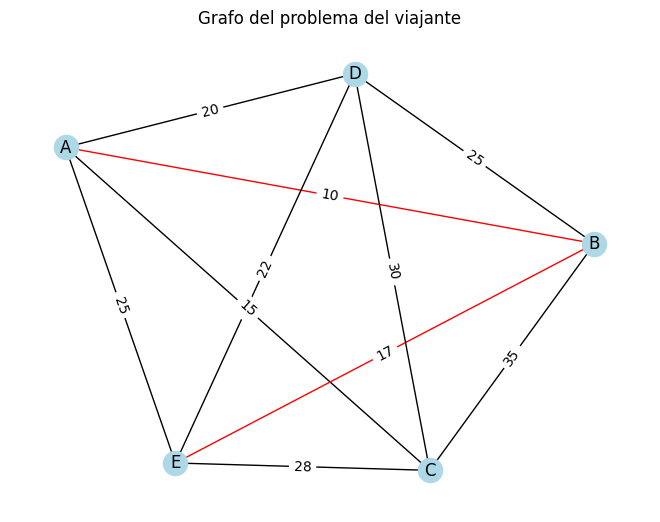

Mejor ruta: A -> B -> E -> D -> C -> A
Distancia total: 94


In [7]:
import networkx as nx
import matplotlib.pyplot as plt
import itertools

# Ciudades y matriz de distancias (igual que en tu código)
ciudades = ['A', 'B', 'C', 'D', 'E']
distancias = [
    [0, 10, 15, 20, 25],
    [10, 0, 35, 25, 17],
    [15, 35, 0, 30, 28],
    [20, 25, 30, 0, 22],
    [25, 17, 28, 22, 0]
]

# Crea el grafo
G = nx.Graph()
for i in range(len(ciudades)):
    for j in range(i + 1, len(ciudades)):  # Evita aristas duplicadas
        G.add_edge(ciudades[i], ciudades[j], weight=distancias[i][j])

# Encuentra la mejor ruta (igual que en tu código)
rutas_posibles = itertools.permutations([1, 2, 3, 4])
mejor_distancia = float('inf')
mejor_ruta = []

for ruta in rutas_posibles:
    ruta_completa = [0] + list(ruta) + [0]
    distancia_total = sum(
        distancias[ruta_completa[i]][ruta_completa[i + 1]] for i in range(len(ruta_completa) - 1)
    )
    if distancia_total < mejor_distancia:
        mejor_distancia = distancia_total
        mejor_ruta = ruta_completa

# Resaltar la mejor ruta en el grafo
ruta_aristas = [(ciudades[mejor_ruta[i]], ciudades[mejor_ruta[i + 1]]) for i in range(len(mejor_ruta) - 1)]
colores_aristas = ['red' if arista in ruta_aristas else 'black' for arista in G.edges()]

# Dibujar el grafo
pos = nx.spring_layout(G)  # Define la disposición de los nodos
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color=colores_aristas)
etiquetas_aristas = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=etiquetas_aristas)
plt.title("Grafo del problema del viajante")
plt.show()

print(f"Mejor ruta: {' -> '.join([ciudades[i] for i in mejor_ruta])}")
print(f"Distancia total: {mejor_distancia}")